In [9]:
import sys
import os
from itertools import product

# Add the scripts/ directory to the system path
sys.path.append(os.path.abspath("../scripts"))

In [10]:
# Import necessary functions
from fault_modeling import simulate, compare_logs, visualize_circuit, circuit
from bayesian_diagnosis import run_bayesian_fault_diagnosis
from sensitivity_analysis import run_sensitivity_analysis, gate_sensitivity_analysis, plot_sensitivity, circuit

## Fault Modeling Example

🧾 Healthy Simulation Log:
A: 1
B: 0
N1: 0
N2: 0
N3: 0

💥 Faulty Simulation Log (N1 stuck at 1):
A: 1
B: 0
N1: 1
N2: 0
N3: 1

🔍 Fault-Affected Nodes:
N1: Healthy=0, Faulty=1
N3: Healthy=0, Faulty=1


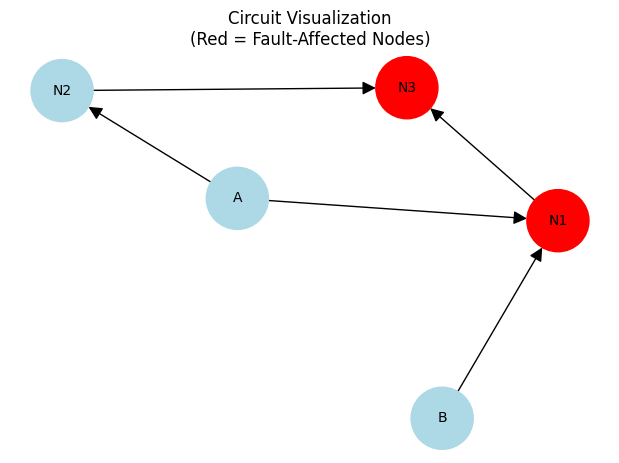

In [11]:
# Define the specific input
inputs = {'A': 1, 'B': 0}

# Run healthy simulation
healthy_log = simulate(inputs)

# Run faulty simulation: inject fault at N1 stuck-at-1
faulty_log = simulate(inputs, fault_node='N1', fault_value=1)

# Compare healthy vs faulty
diffs = compare_logs(healthy_log, faulty_log)

# Print output logs
print("🧾 Healthy Simulation Log:")
for node, val in healthy_log.items():
    print(f"{node}: {val}")

print("\n💥 Faulty Simulation Log (N1 stuck at 1):")
for node, val in faulty_log.items():
    print(f"{node}: {val}")

print("\n🔍 Fault-Affected Nodes:")
for node, (h, f) in diffs.items():
    print(f"{node}: Healthy={h}, Faulty={f}")

# Visualize the circuit
visualize_circuit(circuit, diffs=diffs)

This specific example (`A=1, B=0` with a fault at `N1` stuck-at-1) was chosen because it clearly demonstrates fault propagation through multiple nodes (N1 and N3).  
It highlights how a single gate fault can affect downstream logic, similar to cascading effects observed in biological regulatory networks.

### Bayesian Fault Diagnosis Setup

For this demonstration, the input-output observations were hardcoded based on a controlled experimental scenario:
- Inputs (A=1, B=1) → Observed Z=0 (unexpected behavior)
- Inputs (A=0, B=0) → Observed Z=1 (normal behavior)

This set of observations ensures reproducibility of results and a clear demonstration of Bayesian updating for fault diagnosis.

In [12]:
run_bayesian_fault_diagnosis()


🔎 Processing Observation 1: Inputs (A=1, B=1), Observed Z=0

🔎 Processing Observation 2: Inputs (A=0, B=0), Observed Z=1

📊 Updated Fault Probabilities after Observations:
X_0: 98.0296%
X_1: 0.9803%
Y_0: 0.0098%
Y_1: 0.9803%


### Fault Sensitivity Analysis

stuck-at faults at each gate are injected and measures how often faults lead to incorrect final outputs across all input combinations.
Gates with higher sensitivity scores are more critical for correct circuit operation.
The sensitivity plot is displayed interactively when running in the notebook, and saved to a file when running the script.



🔬 Sensitivity Scores (1.0 = always causes fault):
N1: 0.25
N2: 0.38
N3: 0.50


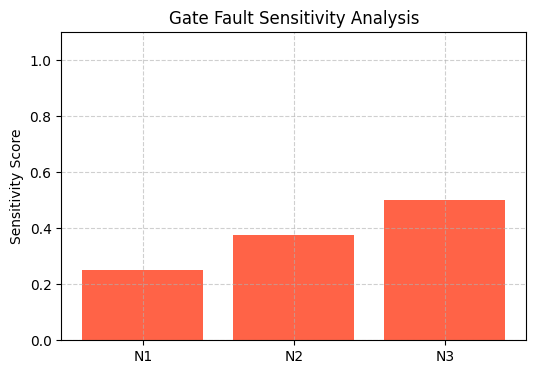

📁 Sensitivity plot saved to: ../figures/sensitivity_plot.png


In [13]:
run_sensitivity_analysis(save_fig=False)

all_inputs = [{'A': a, 'B': b} for a, b in product([0, 1], repeat=2)]
sensitivity = gate_sensitivity_analysis(circuit, all_inputs)
plot_sensitivity(sensitivity, save_path="../figures/sensitivity_plot.png")